In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import collections

In [5]:
df = pd.read_csv('./CrawledData/윤석열/윤석열_unsmile.csv',encoding='utf-8')

In [6]:
label = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

In [7]:
stats = []
for i in label:
    stats.append(df[i].sum())

In [8]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

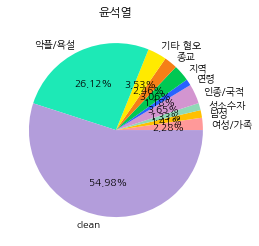

In [9]:
#wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2962FF', '#00c853', '#f57f17', '#ffea00', '#1De9B6', '#b39ddb']
plt.axis=('equal')
plt.title('윤석열')
plt.pie(stats, labels=label, autopct='%.2f%%', colors=colors)
plt.show()

In [10]:
# 카테고리별로 점수가 높은 순서대로 정렬
df_woman = df.sort_values(by='여성/가족', ascending=False).groupby('text').head(10)
df_man = df.sort_values(by='남성', ascending=False).groupby('text').head(10)
df_region = df.sort_values(by='지역', ascending=False).groupby('text').head(10)
df_queer = df.sort_values(by='성소수자', ascending=False).groupby('text').head(10)
df_religion = df.sort_values(by='종교', ascending=False).groupby('text').head(10)

In [11]:
df_woman.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
24624,1번남 이재명 여성 상식 정의 실력 실적 능력 2번남 윤석열 판페미 무능 무식 무당...,0,0.93,0.04,0.02,0.04,0.03,0.03,0.02,0.14,0.07,0.05
10322,서민 노동자 라는 계급보다 남성이라는 자신이 가진 기득권 계급이 더 소중하니 윤석열...,0,0.93,0.05,0.02,0.05,0.02,0.02,0.02,0.04,0.04,0.04
3494,윤석열이 페미표 받으려고 이수정 신지예 김민전 뽑은것도 너무 웃김 페미들이야 말로 ...,0,0.92,0.02,0.02,0.04,0.02,0.03,0.02,0.07,0.06,0.08
27542,여자들이여 이재명 뽑으세요 이재명 대놓고 여성공약 만들고 윤석열 대놓고 안티페미하는...,0,0.92,0.03,0.02,0.03,0.02,0.03,0.02,0.03,0.05,0.09
9726,여자들아 부탁이다 이재명 뽑아라 제발 윤석열이 대통령 되면 이 나라는 극우파들이 점...,0,0.92,0.04,0.02,0.05,0.03,0.02,0.02,0.06,0.07,0.04
15662,트페미들은 지능이 낮은가 이준석이 후보야 박지현이 후보야 얘네가 국회의원이나 시 도...,0,0.91,0.02,0.03,0.03,0.02,0.01,0.01,0.05,0.06,0.06
23833,이준석이 진정한 페미니스트 심상정 하고 추켜세우는거 보면 답이 심상정 뽑으면 윤석열...,0,0.91,0.04,0.01,0.03,0.02,0.02,0.01,0.05,0.08,0.06
21962,윤석열 찍고 왔음 트페미들 개난리치던데 윤씨 뽑아야할 이유와 이씨 뽑으면 안되는 제...,0,0.90,0.02,0.02,0.07,0.01,0.03,0.01,0.09,0.09,0.05
10796,지금 여가부폐지를 공약으로 건 인간에게 투표를 하시겠다는 건가요 여가부는 남혐부니까...,0,0.90,0.02,0.02,0.03,0.01,0.02,0.01,0.06,0.08,0.07
11208,어디서 페미가 윤석열에게 앵겨 붙는거냐 페미 조은희는 꺼져라,0,0.90,0.03,0.02,0.03,0.01,0.02,0.02,0.03,0.08,0.06


In [12]:
df_religion.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
18876,기독교인들 무속잡귀신 믿는 윤석열 찍으면 지옥행 특급탄다 단디 해라 정신차리고,0,0.02,0.03,0.03,0.05,0.02,0.03,0.95,0.05,0.04,0.04
1875,누가 언제 윤석열이 개독과 수꼴의 급폭망을 가져온다고 예언했던가,0,0.03,0.02,0.03,0.07,0.08,0.05,0.94,0.13,0.02,0.03
26750,신자들은 진정한 그리스도인이 많지만 많은 목사들은 그냥 먹사 돈과 빤스 밝히는 세상...,0,0.02,0.02,0.03,0.04,0.02,0.02,0.94,0.04,0.03,0.05
6313,윤석열 지지선언 한 개독교 개목사들은 사이비다,0,0.03,0.02,0.03,0.05,0.02,0.02,0.94,0.04,0.02,0.04
635,우상을 숭배하지 말라는 예수님 말씀을 거역하고 우상을 숭배하는 무속인 김건희와 윤석...,0,0.01,0.02,0.04,0.06,0.02,0.02,0.94,0.04,0.03,0.04
15104,목사 777명 윤석열 지지 선언 목사 종교 장사치들,0,0.03,0.02,0.02,0.04,0.02,0.02,0.93,0.03,0.03,0.05
3645,윤석열을 낙선시켜서 신천지를 비롯한 정체불명 법사 도사 등 사이비 종교 패거리와 함...,0,0.01,0.01,0.05,0.09,0.01,0.03,0.93,0.06,0.04,0.03
6110,#윤석열 #신천지 #사이비종교 #목사님들,1,0.03,0.02,0.08,0.05,0.01,0.03,0.93,0.08,0.02,0.03
7099,단독 역술 무속 공방 한창인 와중에 공개한 흥미진진한 이야기 이재명 윤석열 후보 부...,1,0.01,0.02,0.02,0.08,0.01,0.04,0.93,0.04,0.02,0.07
15099,ㅋㅋ 어디서 사이비 목사들이 설치고 지랄이냐 기독교 망신 시키지 말고 찌그러져라 목...,0,0.02,0.02,0.02,0.05,0.02,0.02,0.93,0.04,0.04,0.03


In [13]:
df_man.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
24340,하시밯진짜 소추도태남마냥 남초 커뮤질만 안 하면 걍 바로 윤석열 뽑는 건데 한남들 ...,0,0.03,0.95,0.04,0.06,0.05,0.03,0.02,0.02,0.05,0.04
18817,트페미 관점으로 가족 구성원만 봐도 전과4범 총각사칭 불륜 형수 쌍욕남 이재명 불법...,0,0.05,0.95,0.02,0.08,0.03,0.03,0.03,0.03,0.05,0.04
9874,진짜 너무 걱정된다 윤석열 사단은 한남들이 머리에 든 게 없단 사실을 정말 제대로 ...,0,0.05,0.94,0.03,0.03,0.04,0.03,0.02,0.03,0.05,0.04
15503,가장 극적 이었던 것은 딸 하나 가진 50대 아버님이 딸에게 윤석열 이준석이 승리하...,1,0.05,0.94,0.02,0.06,0.04,0.02,0.02,0.02,0.04,0.04
10925,윤석열과 이준석과 한남들의 콜라보로 여가부폐지가 이루어지면 그 다음은 낙태죄부활 호...,0,0.10,0.93,0.02,0.07,0.03,0.02,0.02,0.02,0.03,0.03
11450,한국 대선에 윤석열같은게 되고 이준석같은게 나와도 그냥 그러려니 하고 여자들은 탈조...,0,0.07,0.93,0.03,0.05,0.03,0.02,0.02,0.02,0.05,0.04
23685,이준석 한남연대 윤석열 2번남 1타 4피 아 철수까지 하면 5피인가,1,0.03,0.93,0.02,0.04,0.04,0.02,0.02,0.02,0.04,0.06
22875,이재명윤석열 둘다 남자인게 꼬움 ㅅㅂ한남새끼,0,0.02,0.93,0.05,0.06,0.03,0.03,0.02,0.02,0.04,0.04
22835,대체 뭘까 싶다 주지지층이 남들 행동제어하고 선택제어하는 거 좋아하는 한남이거나 지...,0,0.07,0.92,0.02,0.02,0.12,0.02,0.02,0.03,0.05,0.04
22592,윤석열 족발열차가 보여주듯 권위주의 상전행세 할것 이대남들 정신차려라,0,0.07,0.92,0.02,0.05,0.04,0.03,0.01,0.04,0.04,0.03


In [14]:
df_region.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
3919,아니 전라도 7시 그동네 좌빨홍어 이게 보수 커뮤니티의 평균 정서인거 아무도 반박못...,0,0.03,0.02,0.03,0.07,0.03,0.96,0.03,0.05,0.03,0.04
17466,속보 홍어를 좋아하는 엄마들과 자녀들 모임 미식가 컨소시엄 윤석열 지지언선,0,0.04,0.02,0.02,0.06,0.02,0.95,0.03,0.04,0.03,0.07
10837,광주는 둘다 원한다 그래서 윤석열이다 호남을 21세기의 낙오자로 만들려는 호남인질범...,0,0.02,0.01,0.03,0.05,0.02,0.94,0.04,0.06,0.04,0.06
22965,fake 야 이름이 사기꾼이네 30년가까이 이재명은 광주를 폭도 라고칭한것 광주에서...,0,0.02,0.02,0.02,0.15,0.02,0.94,0.05,0.04,0.03,0.04
9238,전라 들 이런 후보를 내편이라 찍었다간 개 돼지 취급당할까 심히 우려된다 전라디언이...,0,0.02,0.02,0.02,0.07,0.02,0.94,0.03,0.04,0.04,0.04
14479,한번 홍어면 영원한 홍어다 얘들은 절대 변하지 않는다 TK가 븅신일 뿐이다 여론조사...,0,0.02,0.02,0.02,0.05,0.02,0.94,0.03,0.03,0.04,0.05
3851,ㄹ 윤석열이 전주 연설에서 그랬잖아 민주당 그렇게 열심히 지지해줬는데 뭐가 돌아왔냐...,0,0.02,0.01,0.02,0.09,0.02,0.94,0.06,0.06,0.04,0.03
15013,전라도 문디들이 민주당을 살리자고 이재명 문디를 지지하는 것 이재명 지지율이 올라 ...,0,0.02,0.02,0.02,0.05,0.02,0.94,0.03,0.03,0.03,0.07
8923,전라도 광주가 민주당땜시 역내GDP 꼴찌라고 거짓말로 선동하는 윤석열 몰라서 런건지...,0,0.02,0.02,0.02,0.06,0.02,0.94,0.03,0.03,0.04,0.06
24674,윤석열뽑는전라도이대남,0,0.03,0.03,0.03,0.05,0.02,0.94,0.02,0.03,0.03,0.08


In [15]:
df_queer.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
3885,우리 교회에서도 동성애 반대한다고 목사가 단상에서 입에 침을 튀기며 설교하다가 캐나...,0,0.02,0.01,0.82,0.02,0.01,0.01,0.09,0.04,0.04,0.05
8950,윤석열이 성소수자 앞에서 그들의 말이라도 들었나 이재명이 비웃음은 잘 못됐지만 당신...,0,0.03,0.01,0.82,0.02,0.01,0.01,0.03,0.05,0.07,0.06
14809,아빠20대딸래미가둘이나잇는데진심으로윤석열이뽑고싶은거야 심지어하나는성소수자인데도 라고...,0,0.03,0.02,0.71,0.01,0.01,0.01,0.01,0.04,0.10,0.30
11788,윤석열 뽑는다는 건 기회균등이나 복지나 여성 및 소수자 인권은 물론 자유민주주의도 ...,0,0.35,0.02,0.65,0.02,0.02,0.02,0.01,0.33,0.07,0.06
20430,윤석열 지지 선언한 직업군인 똥별들보다 의무복무 하면서 나라에 청춘을 바친 장병들의...,0,0.05,0.01,0.61,0.16,0.08,0.02,0.04,0.44,0.05,0.04
10529,윤석열 후보는 물백신 맞았나요 코로나 백신 3차 접종하신 분들은 병원에 가셔서 에이...,0,0.02,0.02,0.56,0.01,0.01,0.01,0.01,0.04,0.16,0.31
10443,윤석열이 여성과 소수자 혐오를 쏟아낸게 하루이틀이 아닌데 몇년간 민주당만 패다가 갑...,0,0.15,0.02,0.52,0.02,0.01,0.01,0.01,0.16,0.10,0.10
13201,이재명이 당선되면 적어도 여성 장애인 성소수자 청소년 기후위기 의제에서 5 5까지 ...,0,0.10,0.01,0.46,0.02,0.01,0.02,0.01,0.11,0.06,0.22
14022,전화영어 오늘의 주제는 대선개입이었다 당연히 우리나라 대선으로 화제가 돌려졌고 나는...,0,0.03,0.01,0.46,0.01,0.01,0.01,0.01,0.04,0.11,0.34
4323,펜스는 딥 스테이트 동성애를 했습니다 윤석열이는 펜스를 만나서,0,0.02,0.01,0.45,0.01,0.01,0.01,0.02,0.02,0.09,0.31


In [16]:
# 0.6이상인 텍스트들만 추출
df_woman = df_woman[df_woman['여성/가족'] >= 0.6]
df_man = df_man[df_man['남성'] >= 0.6]
df_region = df_region[df_region['지역'] >= 0.6]
df_queer = df_queer[df_queer['성소수자'] >= 0.6]
df_religion = df_religion[df_religion['종교'] >= 0.6]

In [17]:
# 전체 갯수 확인
print(len(df_woman))
print(len(df_man))
print(len(df_region))
print(len(df_queer))
print(len(df_religion))

146
69
268
5
210


In [19]:
print('여성/가족 긍정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[1]))
print('여성/가족 부정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[0]))
print('남성 긍정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[1]))
print('남성 부정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[0]))
print('지역 긍정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[1]))
print('지역 부정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[0]))
#print('성소수자 긍정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[1]))
print('성소수자 부정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[0]))
print('성소수자 긍정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[1]))
print('성소수자 부정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[0]))

여성/가족 긍정 리뷰 갯수: 16
여성/가족 부정 리뷰 갯수: 130
남성 긍정 리뷰 갯수: 14
남성 부정 리뷰 갯수: 55
지역 긍정 리뷰 갯수: 50
지역 부정 리뷰 갯수: 218
성소수자 부정 리뷰 갯수: 5
성소수자 긍정 리뷰 갯수: 51
성소수자 부정 리뷰 갯수: 159


In [20]:
# 긍정, 부정 분포도
def posNneg(df):
    label = ['positive', 'negative']
    index =  np.arange(len(df['label']))
    value = [df['label'].value_counts()[1], df['label'].value_counts()[0]]
    value = [0, df['label'].value_counts()[0]]
    plt.bar(label, value, color=['r', 'b'], alpha=0.5)
    plt.title('Distribution of Pos and Neg', fontsize=15)
    plt.xlabel('label')
    plt.ylabel('count')
    plt.show()

In [21]:
# 백업용 저장
df_woman.to_csv('./CrawledData/윤석열/윤석열_여성.csv', encoding='utf-8-sig',sep=',', index=False)
df_man.to_csv('./CrawledData/윤석열/윤석열_남성.csv', encoding='utf-8-sig',sep=',', index=False)
df_region.to_csv('./CrawledData/윤석열/윤석열_지역.csv', encoding='utf-8-sig',sep=',', index=False)
df_queer.to_csv('./CrawledData/윤석열/윤석열_성소수자.csv', encoding='utf-8-sig',sep=',', index=False)
df_religion.to_csv('./CrawledData/윤석열/윤석열_종교.csv', encoding='utf-8-sig',sep=',', index=False)

In [22]:
df_woman = pd.read_csv('./CrawledData/윤석열/윤석열_여성.csv', encoding='utf-8')
df_man = pd.read_csv('./CrawledData/윤석열/윤석열_남성.csv', encoding='utf-8')
df_region = pd.read_csv('./CrawledData/윤석열/윤석열_지역.csv', encoding='utf-8')
df_queer = pd.read_csv('./CrawledData/윤석열/윤석열_성소수자.csv', encoding='utf-8')
df_religion=pd.read_csv('./CrawledData/윤석열/윤석열_종교.csv', encoding='utf-8')

In [23]:
import re

# Basic Cleaning Text Function
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets RT @user_screenname 
    text = re.sub('RT @[\w_]+: ', '', readData)
    text = re.sub('알티', '', text)
    text = re.sub('RT', '', text)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [24]:
from konlpy.tag import Mecab

In [25]:
# Preprocessing code with Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
mecab = Mecab(r"C:/mecab/mecab-ko-dic") # Mecab User Dic Path

def preprocessing_mecab(readData):
    
    #### Clean text
    sentence = CleanText(readData)
    
    #### Tokenize
    morphs = mecab.pos(sentence)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [26]:
df_woman['tokenized'] = df_woman['text'].apply(lambda x: preprocessing_mecab(x))
df_man['tokenized'] = df_man['text'].apply(lambda x: preprocessing_mecab(x))
df_region['tokenized'] = df_region['text'].apply(lambda x: preprocessing_mecab(x))
df_queer['tokenized'] = df_queer['text'].apply(lambda x: preprocessing_mecab(x))
df_religion['tokenized'] = df_religion['text'].apply(lambda x: preprocessing_mecab(x))

In [27]:
token_woman = df_woman['tokenized']
token_man = df_man['tokenized']
token_region = df_region['tokenized']
token_queer = df_queer['tokenized']
token_religion = df_religion['tokenized']

In [28]:
# tokenizing
# stopwords list
stop_words = pd.read_csv('./한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])
stopwords = ['윤석열','된다고','합니다', '입니다', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거','그리고','나오','이번', '때문', '그러', '그런', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','그냥', '한다는', '해서', '인데', '라면', '만들', '라니']
stopwords = stopwords+stop_words
stopwords.remove('여자')

In [29]:
print(stopwords)

['윤석열', '된다고', '합니다', '입니다', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는', '생겼', '인데', '해도', '된다', '이거', '그리고', '나오', '이번', '때문', '그러', '그런', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는', '생겼', '인데', '해도', '된다', '이거', '한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ', '그냥', '한다는', '해서', '인데', '라면', '만들', '라니', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [30]:
category = [token_woman, token_man, token_region, token_queer, token_religion]
title = ['여성/가족', '남성', '지역', '성소수자', '종교']

In [36]:
# 단어 빈도수 생성
def word_frequency(token, title):
    n_corpus = []
    for t in token:
        for j in t:
            if j not in stopwords:
                n_corpus.append(j)

    count = collections.Counter(n_corpus) 
    most = count.most_common() # 빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:40]: 
        x.append(word) 
        y.append(count)
    #plt.rc('font',family='NanumGothic.ttf')
    plt.rcParams['font.family'] = "NanumGothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    sns.barplot(x=y,y=x)
    plt.title(title)

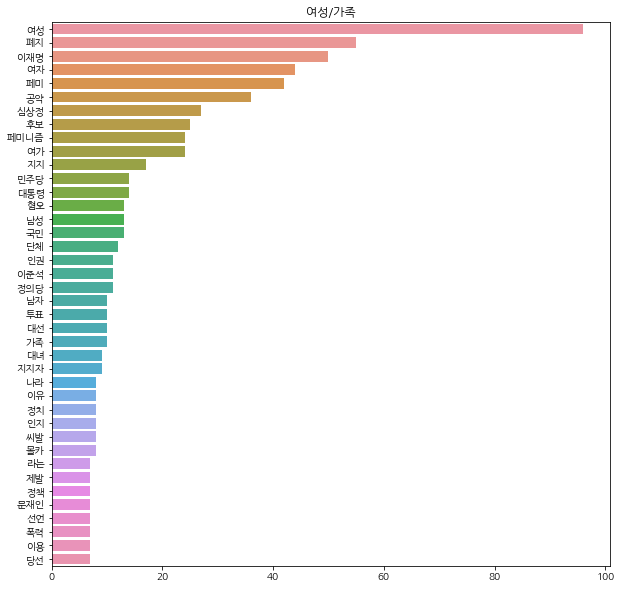

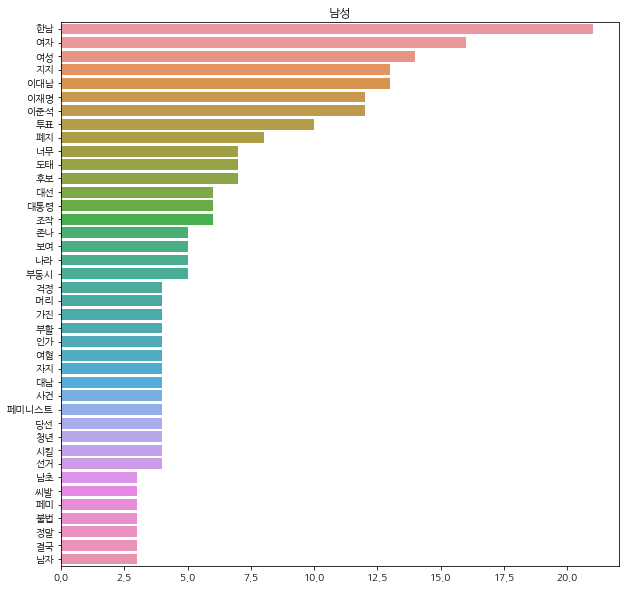

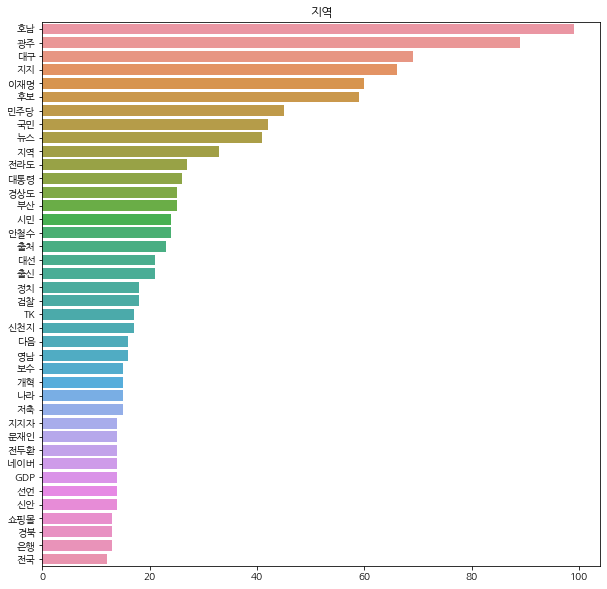

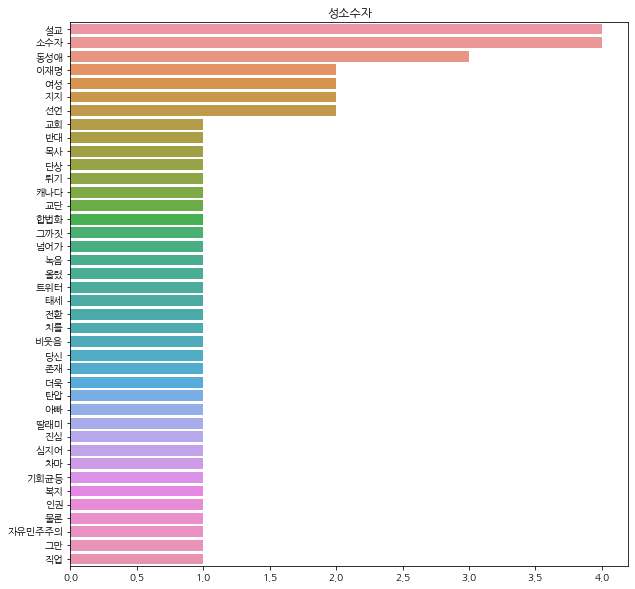

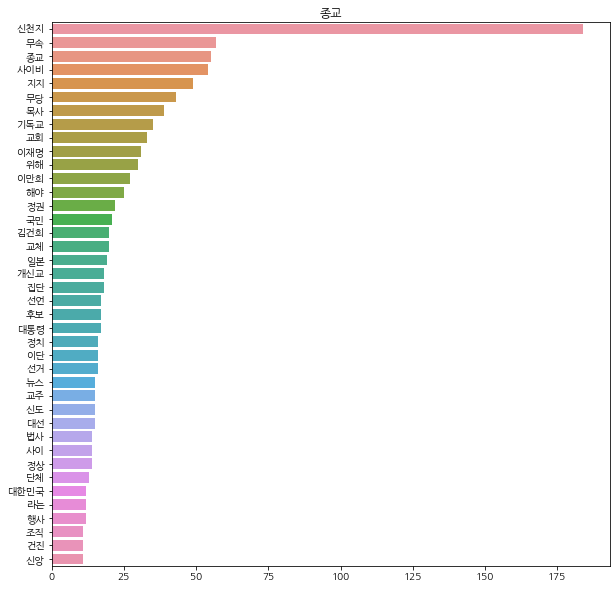

In [37]:
# 여성/가족, 남성, 지역, 성소수자, 종교
for c, t in zip(category, title):
    word_frequency(c, t)

In [40]:
# 워드 클라우드 생성
def make_wordcloud(token, title):
    n_corpus = []
    for t in token:
        for j in t:
            if j not in stopwords:
                n_corpus.append(j)
    font_path = 'C:/Users/Erin/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
    wordcloud = WordCloud(font_path=font_path,
                        background_color="black",
                        stopwords=stopwords, 
                        max_words=100, 
                        # max_font_size=30,
                        width=500,
                        height=500, 
                        random_state=1,
                        scale=3).generate(' '.join(n_corpus))
    fig = plt.figure(1, figsize=(8,8)) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.show()

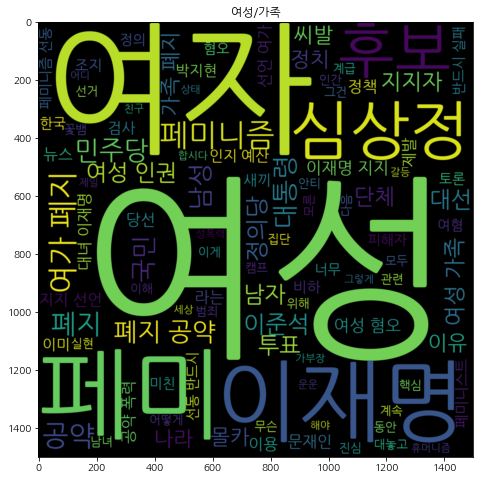

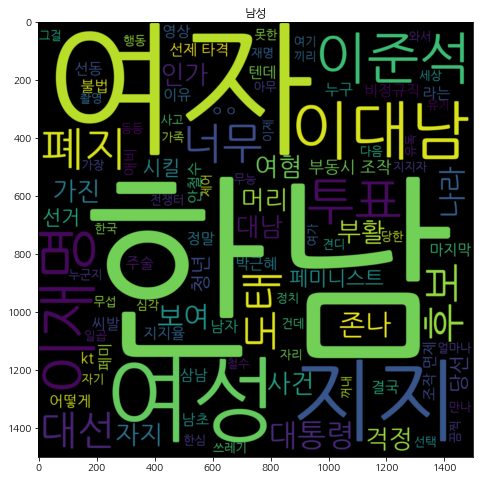

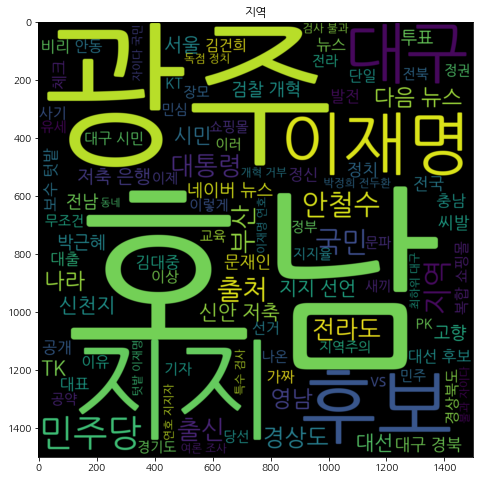

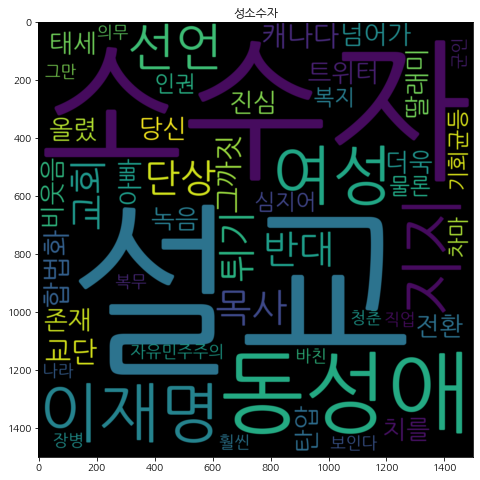

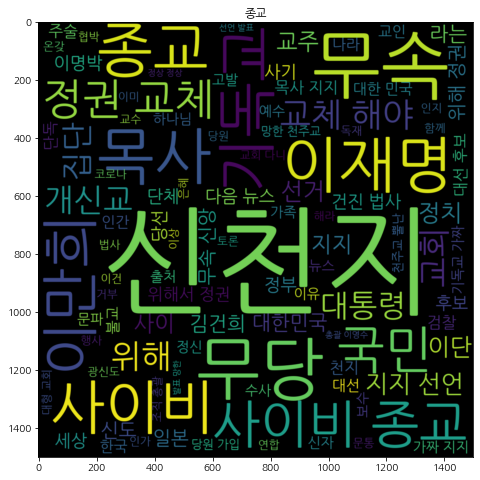

In [41]:
for c, t in zip(category, title):
    make_wordcloud(c, t)